In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import math 

Datasets a importar:
- pob: Población, Crecimiento poblacional, por país
- gdp: PBI per cápita, por país
- countries: dataset con los países reconocidos internacionalmente, para filtrar ambos datasets mencionados

Filtar pob por "Population growth"
Filtrar gdp por Q3 en 2020
Para la lista de países obtenidos de gdp, plotear crec. poblacional vs gdp per cápita:
    - Nube de puntos no ordenada en el tiempo, pero describe relación entre variables.
    - Evaluar esta dispersión y obtener coef de correlación mediante:
        * Regresión lineal
        * Regresión logística
        * Regresión polínomica

In [38]:
pob = pd.read_csv(r"C:\Users\59899\Desktop\Intro a ciencia de datos\Analítica empresarial\Proyecto\Datasets\poblacion\Population-EstimatesData.csv")
pd.set_option("display.max_colwidth",None)
pob["Country Name"].unique()[49:]
# Creación de pob
pob2 = pob[pob["Indicator Name"] == "Population growth (annual %)"]
# pob2 = pob filtrado

for column in pob2.columns[4:-1]:
    if int(column) < 1970 or int(column) > 2035:
        pob2.drop(column, axis=1, inplace=True)
pob2.drop("Indicator Code", axis=1, inplace=True)
#Limpieza, fechas desde 1970 a 2035

countries = pd.read_excel(r"C:\Users\59899\Desktop\Intro a ciencia de datos\Analítica empresarial\Proyecto\Datasets\poblacion\rec_countries.xlsx")
#Dataset filtro para países reconocidos internacionalmente

C:\Users\59899\anaconda33\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
gdp = pd.read_csv(r"C:\Users\59899\Desktop\Intro a ciencia de datos\Analítica empresarial\Proyecto\Datasets\poblacion\gdp per capita\gdp.csv")
gdp2 = gdp.copy()
gdp2 = gdp2[gdp2["2020"].isna()==False]
gdp2 = gdp2[["Country Name","Country Code","2020"]]
gdp2 = gdp2.sort_values(["2020"], ascending=False)
q3 = gdp2.describe()["2020"][-2]
gdp2 = gdp2[gdp2["2020"] > q3]

for index in gdp2.index:
    if gdp2.loc[[index]]["Country Name"][index] not in list(countries["Country Name"]):
        gdp2.drop(index, axis=0, inplace=True)
#gdp2 = gdp filtrado, solo países reconocidos internacionalmente, solo GDP Q3 de 2020

In [40]:
gdp_paises = list(gdp2["Country Name"]) 
# Lista de países Q3 GDP/capita
dic_paises = dict(zip(list(pob2["Country Name"].values),list(pob2["Country Name"].index)))
#Diccionario pais:indice en pob2

In [41]:
for pais in dic_paises.keys():
    if pais not in gdp_paises:
        pob2.drop(labels=dic_paises[pais],axis=0, inplace=True)
for column in pob2.columns:
    if all(pob2[column].isna()) == True:
        pob2.drop(column, axis=1, inplace=True)
#Limpieza de columnas 

In [42]:
pob2.columns
# Data va desde 1970 a 2020, parcialmente completa

Index(['Country Name', 'Country Code', 'Indicator Name', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020'],
      dtype='object')

In [43]:
pob2

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
10080,Andorra,AND,Population growth (annual %),5.165110,5.201188,5.010961,4.888758,4.444252,3.952690,3.447458,...,-0.839472,-1.589924,-2.030744,-1.946518,-1.552135,-0.898981,-0.386281,0.014285,0.179042,0.154134
11202,Australia,AUS,Population growth (annual %),1.970189,3.380294,1.838146,1.528817,2.531220,1.231186,1.002658,...,1.389527,1.745820,1.721151,1.491566,1.439217,1.561940,1.684523,1.536106,1.521654,1.258698
11389,Austria,AUT,Population growth (annual %),0.349219,0.446246,0.581190,0.554041,0.170206,-0.265319,-0.176672,...,0.337081,0.455937,0.589387,0.781542,1.120993,1.081396,0.694621,0.487072,0.444674,0.419001
11950,Bahrain,BHR,Population growth (annual %),3.138963,3.559479,3.934099,4.428497,5.039780,5.646038,6.255515,...,2.960816,1.690358,1.153907,1.587600,2.642767,3.856577,4.678047,4.921024,4.468688,3.615325
12698,Belgium,BEL,Population growth (annual %),0.098614,0.182247,0.391586,0.314659,0.314634,0.288978,0.178674,...,1.301003,0.620164,0.471340,0.443929,0.579446,0.506300,0.385228,0.455185,0.540461,0.581621
15877,Canada,CAN,Population growth (annual %),1.397832,2.948195,1.160847,1.222617,1.396022,1.459425,1.315807,...,0.978698,1.085817,1.056591,1.005338,0.746339,1.132349,1.199682,1.412548,1.415015,1.089591
18869,Cyprus,CYP,Population growth (annual %),1.229295,1.173303,1.143774,1.124699,1.129940,1.150256,1.188897,...,1.092324,0.903504,0.774057,0.734359,0.751316,0.789477,0.808218,0.808549,0.779957,0.730447
19056,Czech Republic,CZE,Population growth (annual %),-0.389873,-0.317564,0.414503,0.552142,0.664900,0.699965,0.667037,...,0.206748,0.139926,0.033170,0.105278,0.196589,0.192048,0.265643,0.334427,0.393789,0.252925
19243,Denmark,DNK,Population growth (annual %),0.751423,0.694896,0.571991,0.604488,0.465594,0.288269,0.251351,...,0.411738,0.376272,0.416901,0.507053,0.706424,0.780393,0.643351,0.495839,0.358131,0.291641
20926,Estonia,EST,Population growth (annual %),1.096145,1.233396,1.123908,0.960032,0.865266,0.785459,0.712743,...,-0.303583,-0.357944,-0.355892,-0.262256,0.065553,0.029112,0.121071,0.348039,0.371554,0.312948


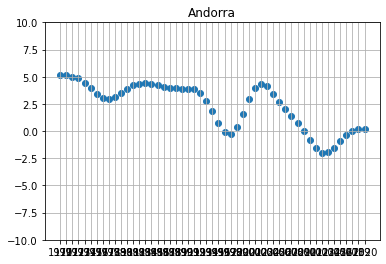

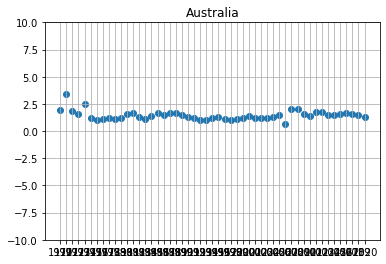

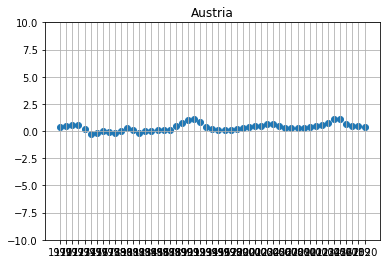

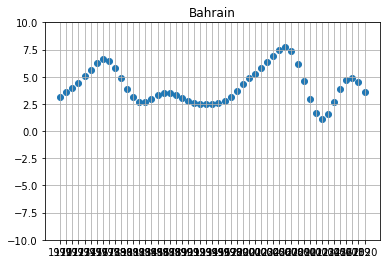

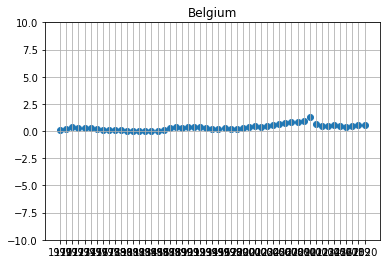

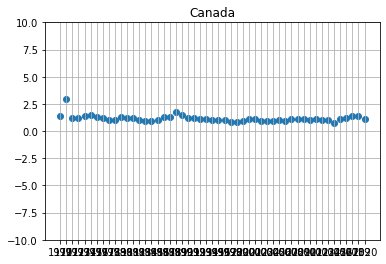

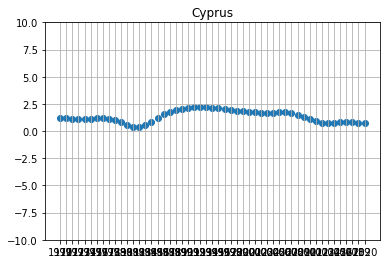

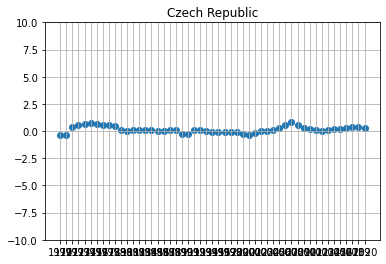

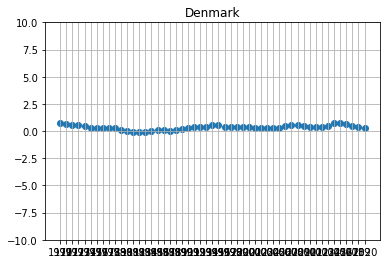

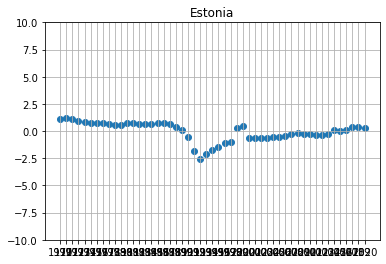

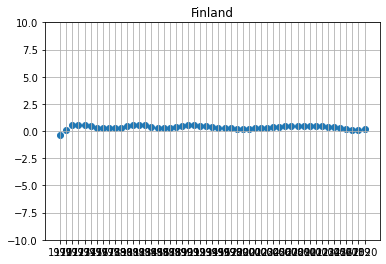

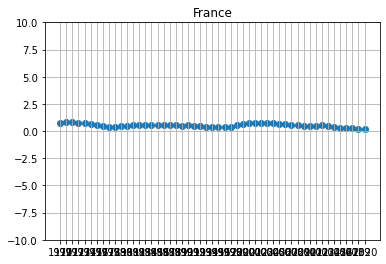

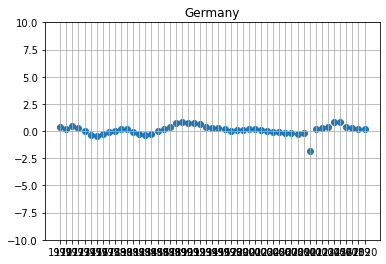

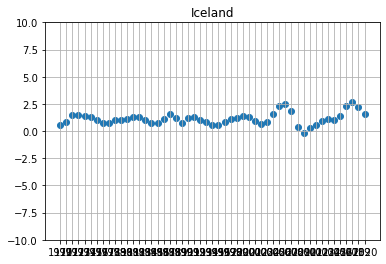

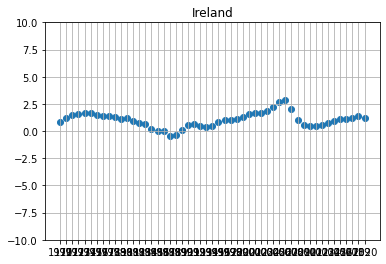

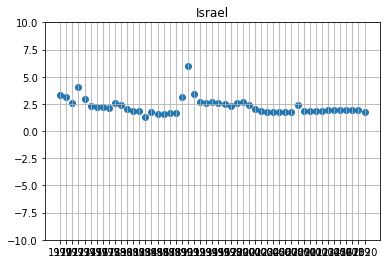

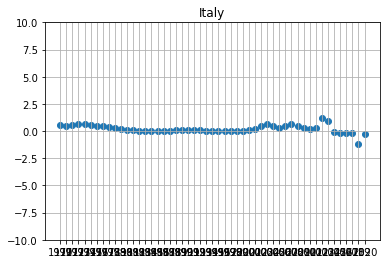

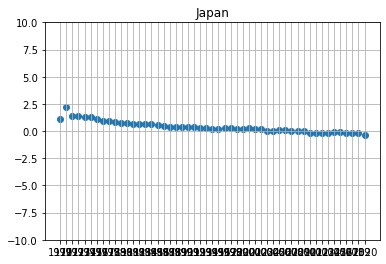

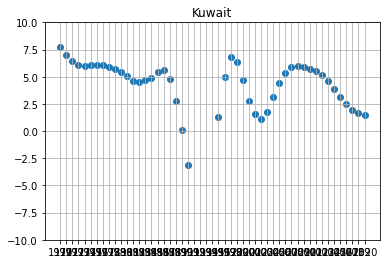

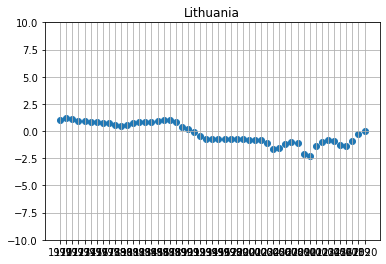

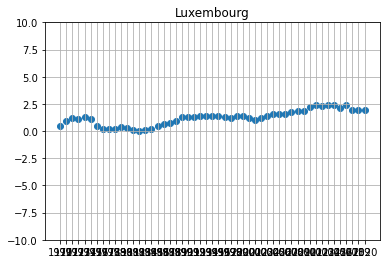

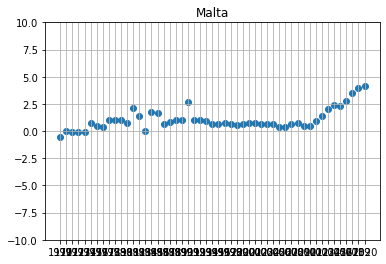

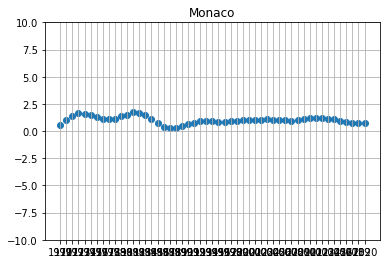

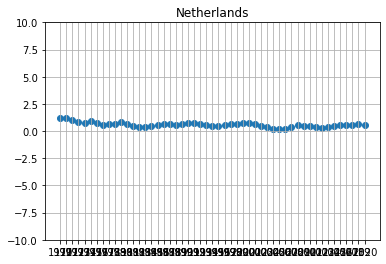

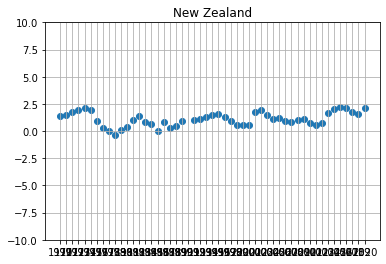

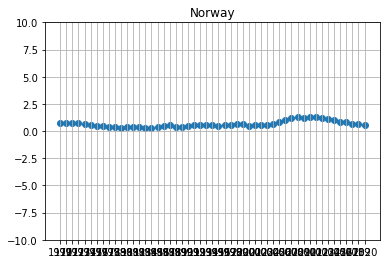

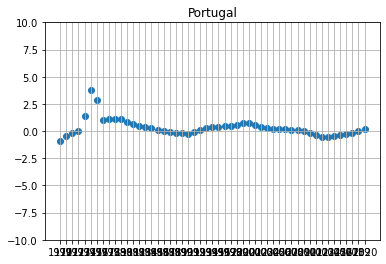

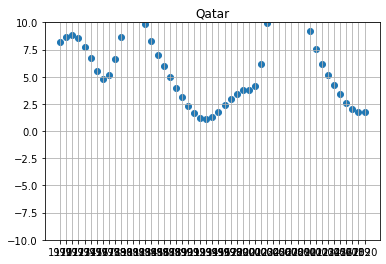

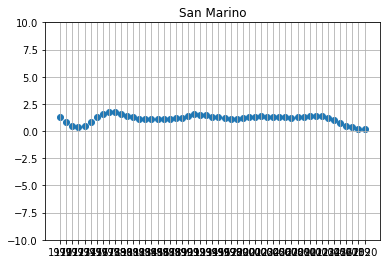

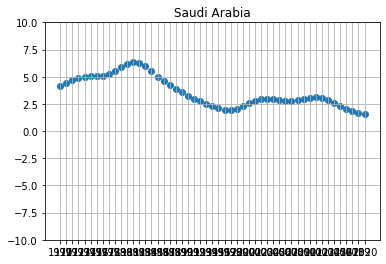

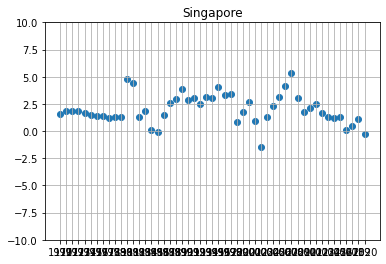

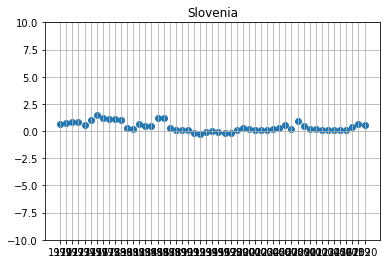

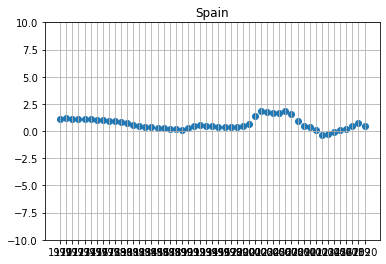

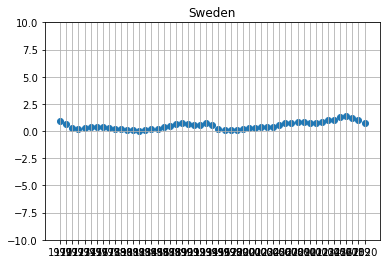

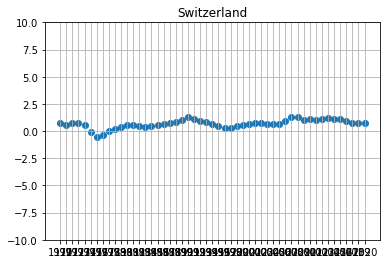

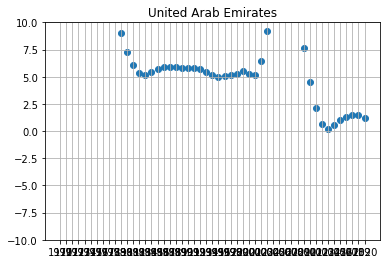

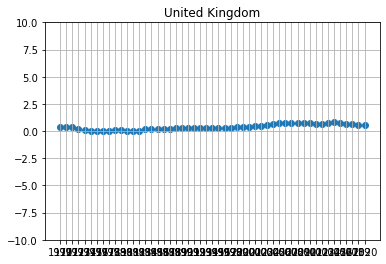

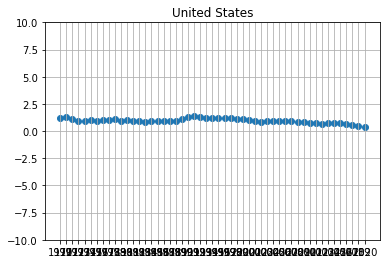

In [44]:
for x in range(len(pob2)):
    plt.figure()
    plt.scatter(pob2.iloc[x,3:].index, pob2.iloc[x,3:].values)
    plt.title(pob2.iloc[x,0])
    plt.ylim(-10,10)
    plt.grid()
    plt.show()
#Ploteo de crecimiento poblacional sobre el tiempo

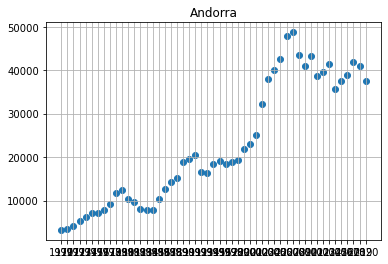

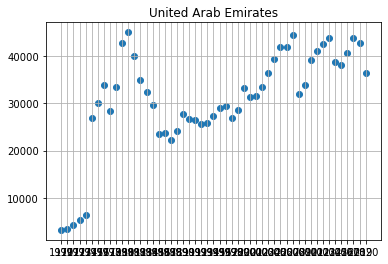

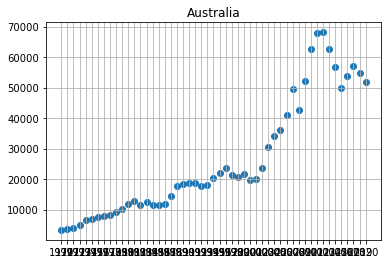

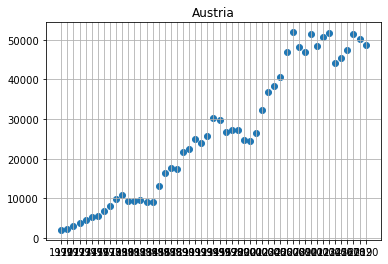

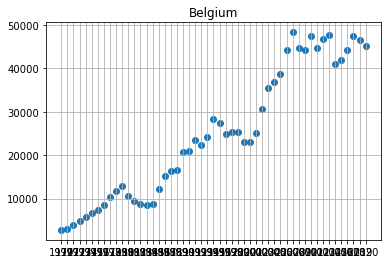

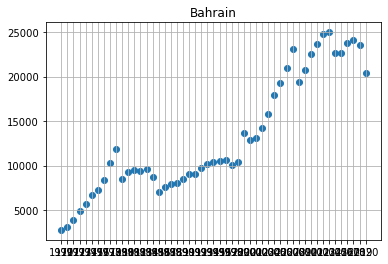

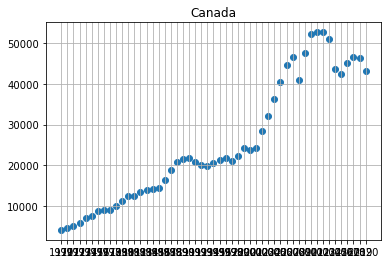

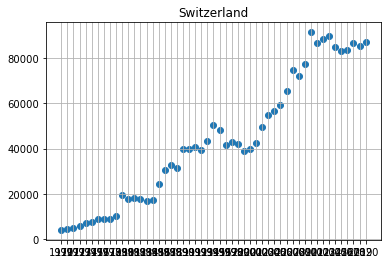

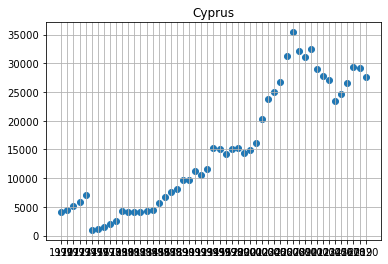

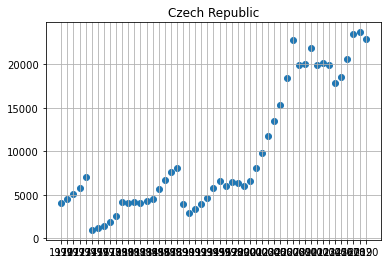

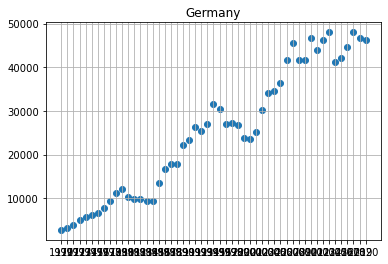

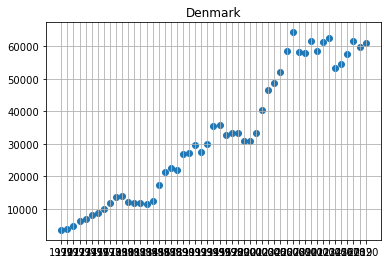

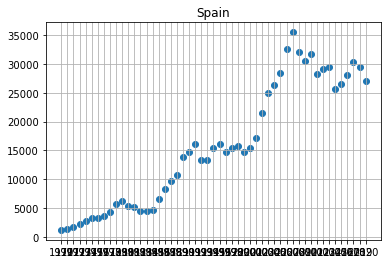

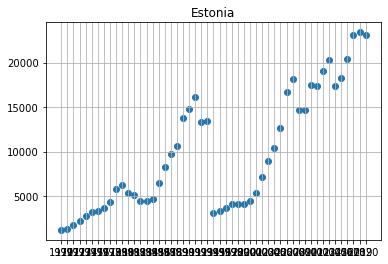

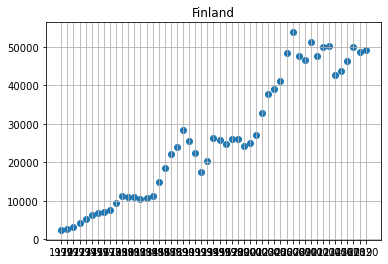

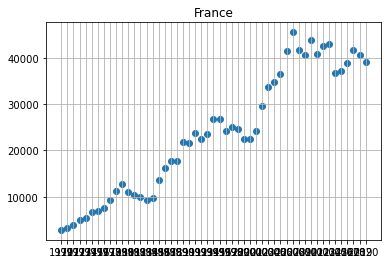

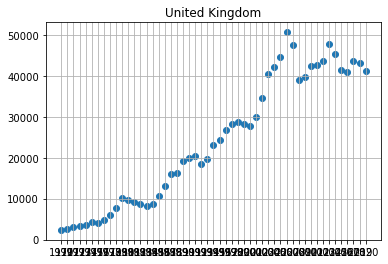

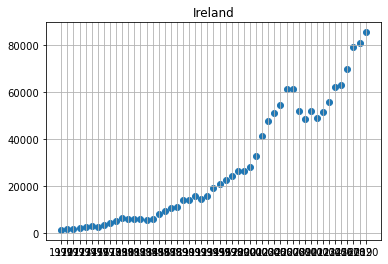

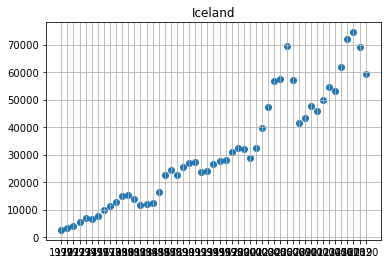

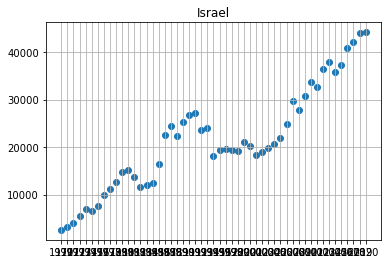

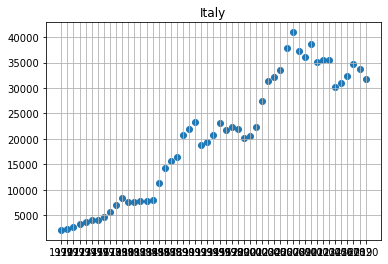

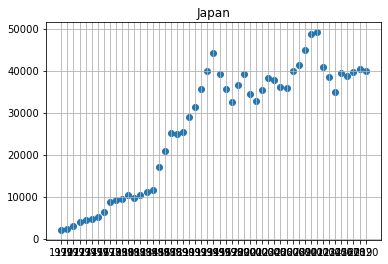

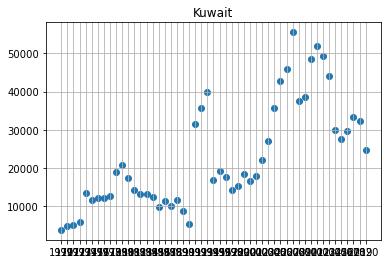

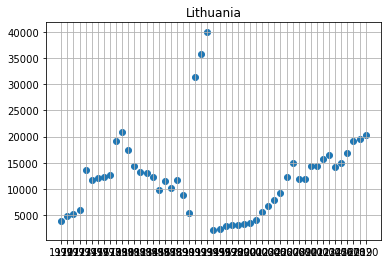

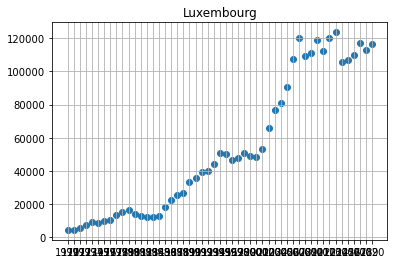

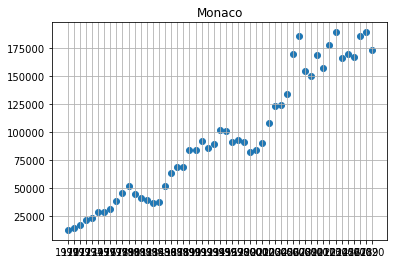

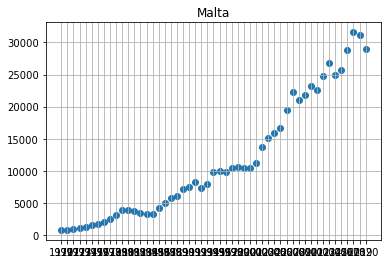

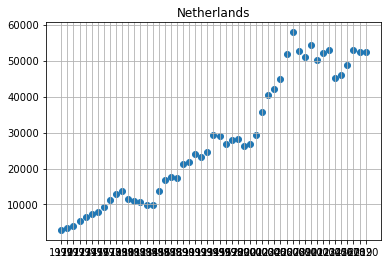

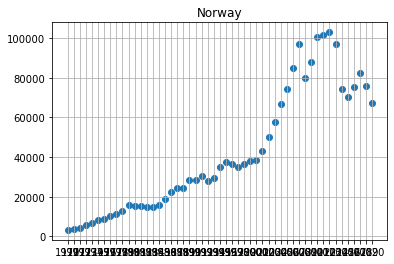

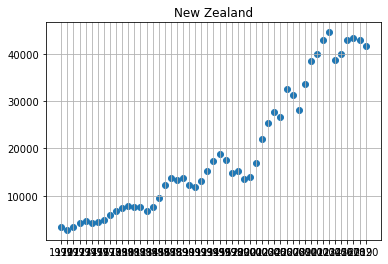

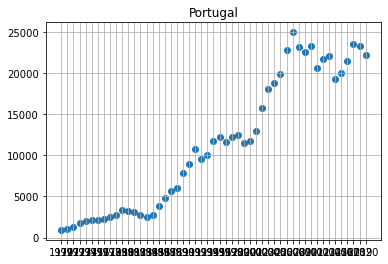

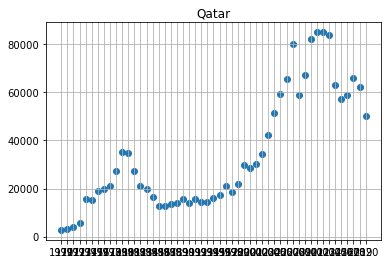

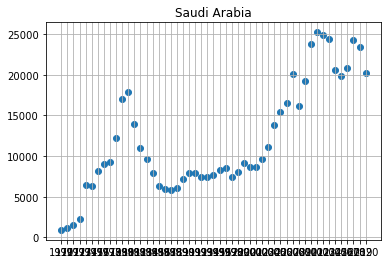

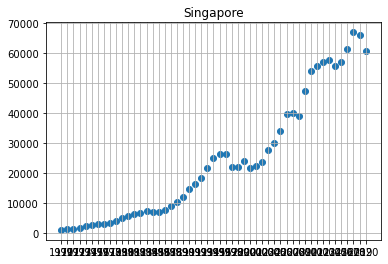

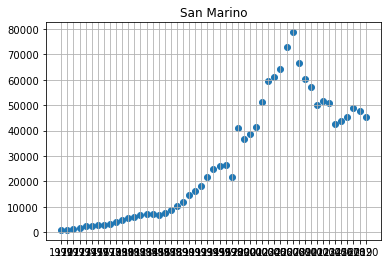

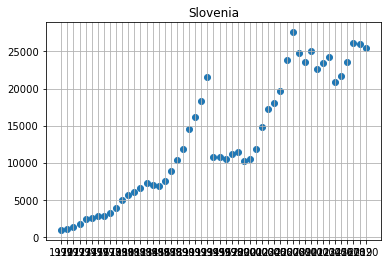

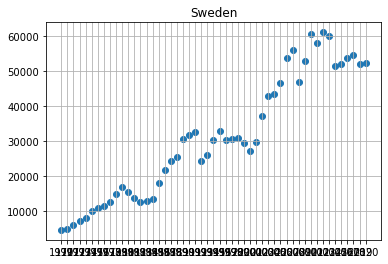

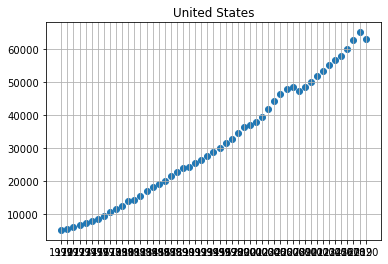

In [15]:
for x in range(len(pob2)):
    plt.figure()
    plt.scatter(gdp3.iloc[x,4:].index, gdp3.iloc[x,4:].values)
    plt.title(gdp3.iloc[x,0])
    plt.grid()
    plt.show()

In [11]:
gdp3 = gdp.copy()
for column in gdp3.columns[4:]:
    if int(column) < 1970:
        gdp3.drop(column, axis=1, inplace=True)

In [12]:
dic_gdp = dict(zip(list(gdp3["Country Name"].values),list(gdp3["Country Name"].index)))

In [13]:
for pais in dic_gdp.keys():
    if pais not in gdp_paises:
        gdp3.drop(labels=dic_gdp[pais],axis=0, inplace=True)

In [14]:
pob2.fillna(method='ffill', inplace=True)
gdp3.fillna(method='ffill', inplace=True)
#Imputación de valores vacíos en ambos datasets, mediante método ffill:
   # method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None
   # Method to use for filling holes in reindexed Series pad:
   # ffill: propagate last valid observation forward to next valid backfill 
   # bfill: use next valid observation to fill gap

C:\Users\59899\anaconda33\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [16]:
r_sq_values = [(np.corrcoef(list(gdp3.iloc[index][4:]), list(pob2.iloc[index][3:]))[0,1])**2 for index in range(len(gdp3["Country Name"].values))]
dic_r2_pearson = dict(zip(list(gdp3["Country Name"].values),r_sq_values))
dic_r2_pearson #Diccionario con coeficiente de relación de Pearson.

{'Andorra': 0.49279946405232466,
 'United Arab Emirates': 0.16860312166758137,
 'Australia': 0.19975984175288253,
 'Austria': 0.0005682345027457951,
 'Belgium': 0.6026151783511687,
 'Bahrain': 0.11084411342861136,
 'Canada': 0.00638802883815082,
 'Switzerland': 0.0009740504254002959,
 'Cyprus': 0.192516114466298,
 'Czech Republic': 0.01395569215091563,
 'Germany': 0.00027513040191352465,
 'Denmark': 0.15956997802604414,
 'Spain': 0.0029883293021357444,
 'Estonia': 0.12565110013625555,
 'Finland': 0.013439467899727702,
 'France': 0.08878927798479964,
 'United Kingdom': 0.00898773182670018,
 'Ireland': 0.6579339428112132,
 'Iceland': 0.09196279540491577,
 'Israel': 0.4276109068977873,
 'Italy': 0.6945998813130474,
 'Japan': 0.10780871405024604,
 'Kuwait': 0.0009283306938994627,
 'Lithuania': 0.00698491865734513,
 'Luxembourg': 0.09082313074609263,
 'Monaco': 0.48753873725728486,
 'Malta': 0.17534322764260318,
 'Netherlands': 0.009552389136306327,
 'Norway': 0.006791361445730611,
 'New Ze

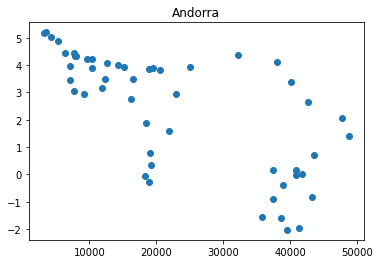

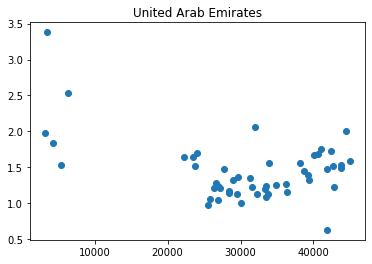

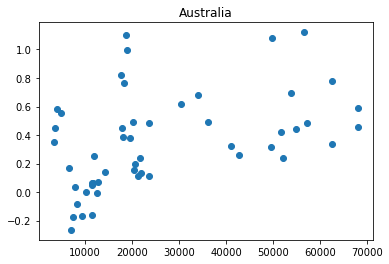

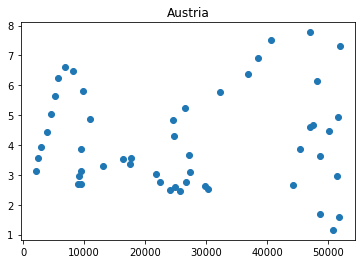

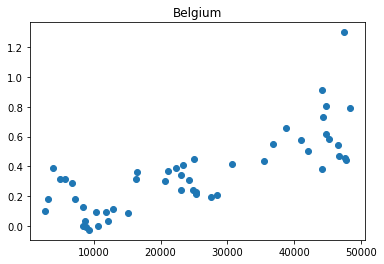

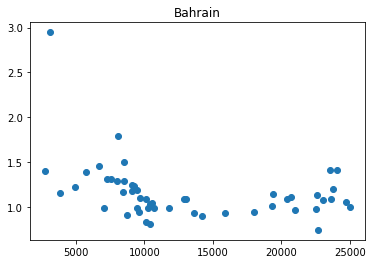

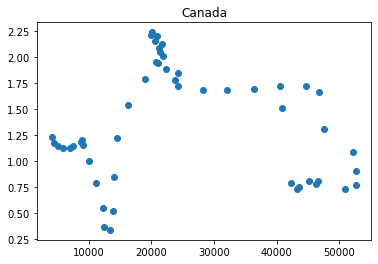

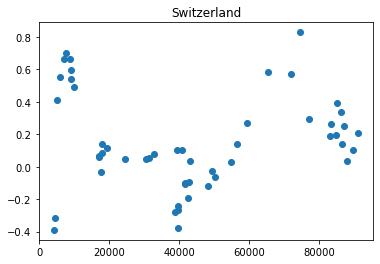

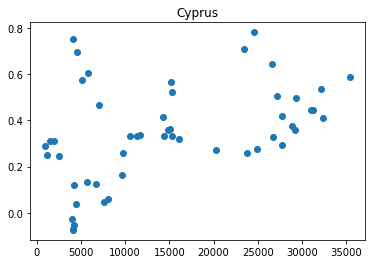

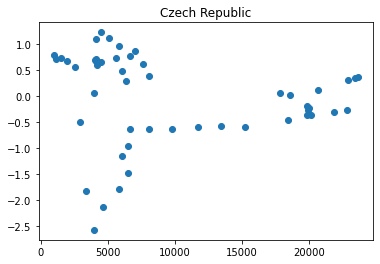

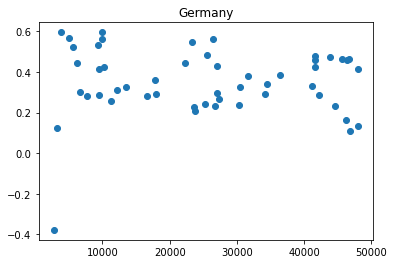

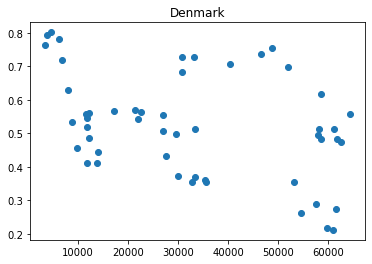

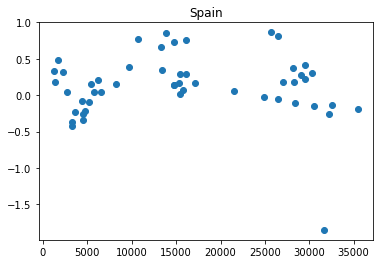

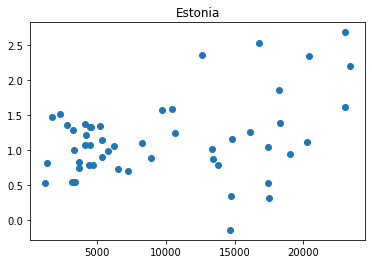

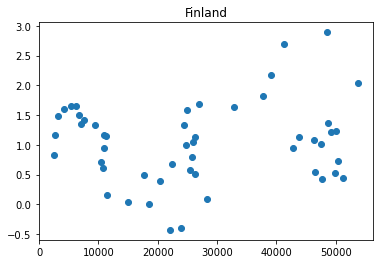

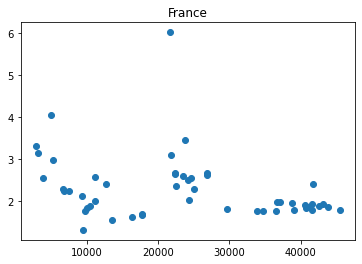

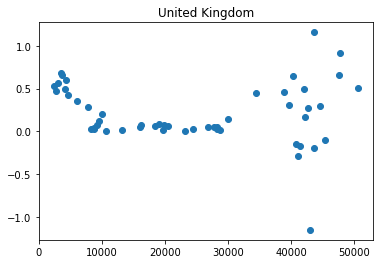

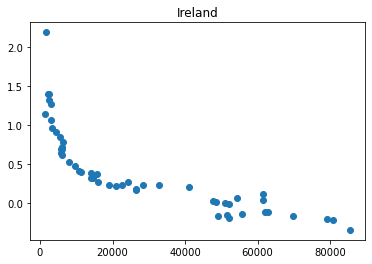

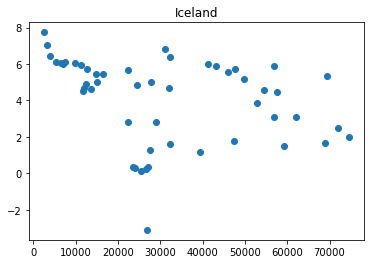

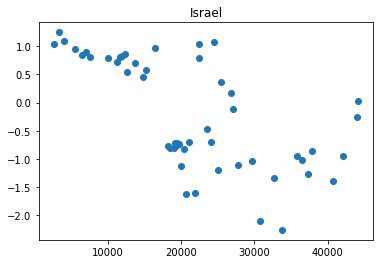

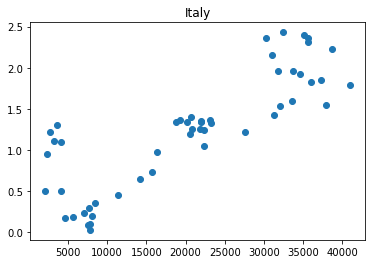

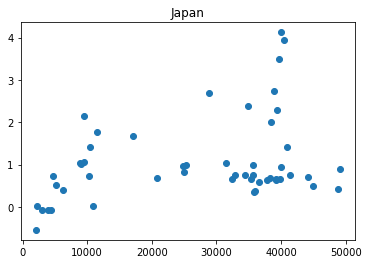

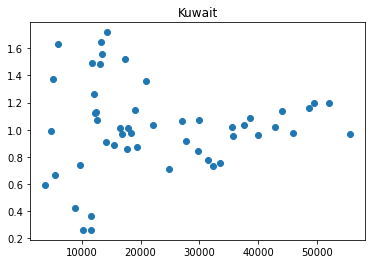

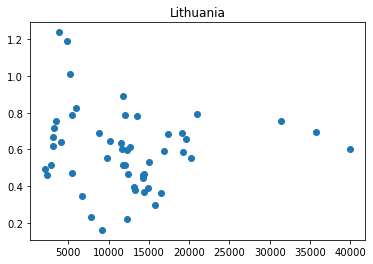

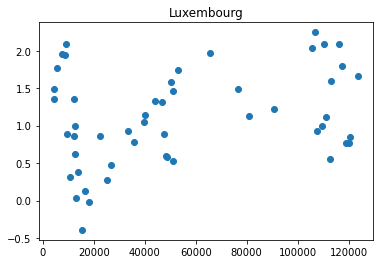

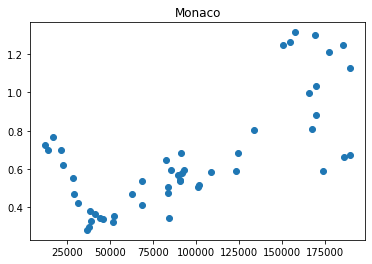

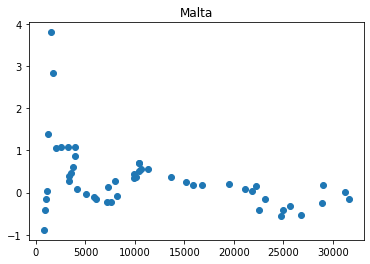

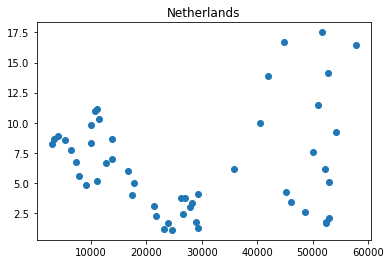

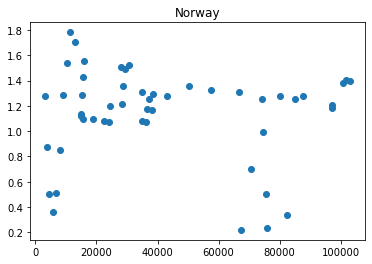

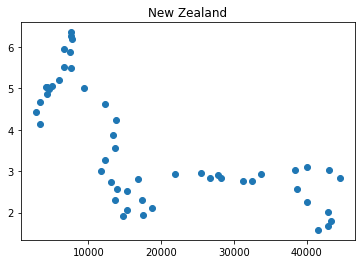

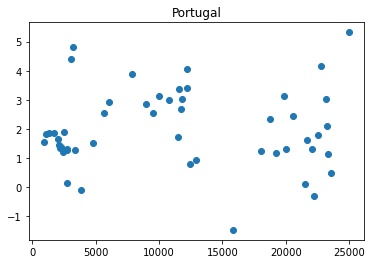

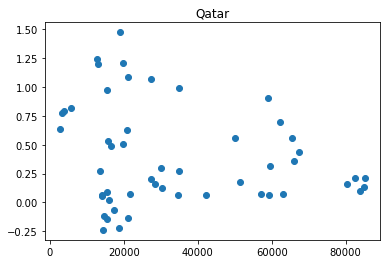

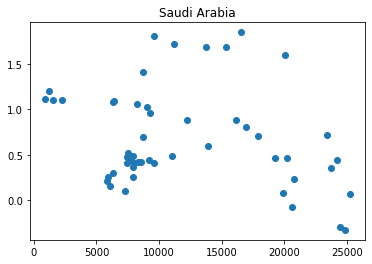

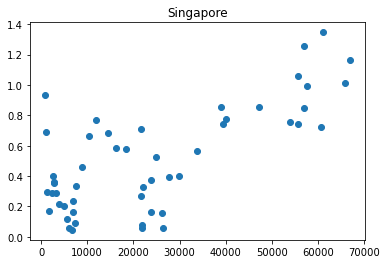

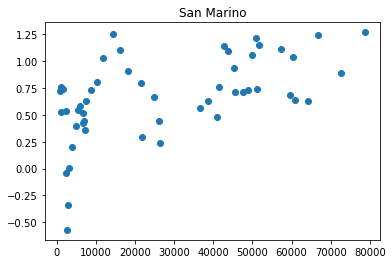

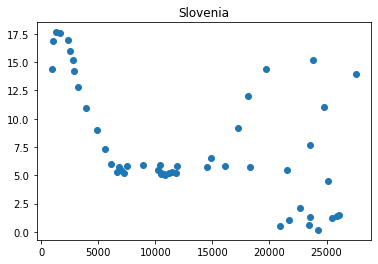

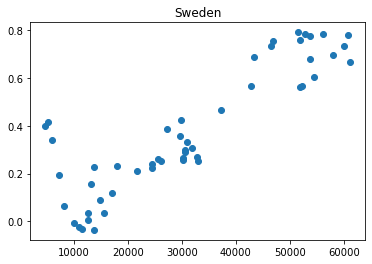

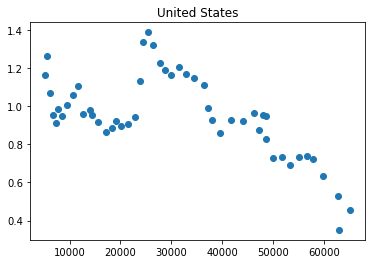

In [17]:
for index in range(len(list(gdp3["Country Name"].values))):
    plt.scatter(gdp3.iloc[index][4:],pob2.iloc[index][3:])
    plt.title(gdp3.iloc[index][0])
    plt.show()

In [18]:
linear_reg = LinearRegression()
bay_reg = linear_model.BayesianRidge()

In [ ]:
X = np.array(gdp3.iloc[0][4:]).reshape(-1,1)
y = np.array(pob2.iloc[0][3:]).reshape(-1,1)

In [19]:
X_1 = np.array(gdp3.columns[4:], dtype="int").reshape(-1,1)
y_1 = np.array(gdp3.iloc[0][4:])

In [26]:
bay_reg.fit(X_1, y_1)

BayesianRidge()

In [35]:
bay_reg.score(X_1, y_1), bay_reg.intercept_

(0.867190932537188, -1765873.1236571677)

In [28]:
pred_gdp_2030 = bay_reg.predict([[2030]])
int(pred_gdp_2030)

54096

In [29]:
years_pred = np.concatenate((np.array(gdp3.columns[4:], dtype="int"),np.arange(2021,2031)))
gdp_values = np.array(gdp3.iloc[0][4:]).reshape(-1,1)

In [30]:
gdp_pred = np.array([int(bay_reg.predict([[year]])) for year in np.arange(2021,2031)]).reshape(-1,1)

In [31]:
gdp_comb = np.concatenate((gdp_values,gdp_pred))

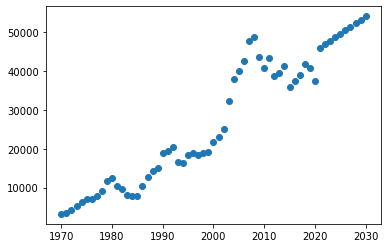

In [32]:
plt.scatter(years_pred,gdp_comb)